In [1]:
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import os # accessing directory structure

# Warning
Change the path as per your saved CSV file directory location

In [2]:
df_2012 = pd.read_csv("data/DMR_2012.csv", delimiter=";")
df_2013 = pd.read_csv("data/DMR_2013.csv", delimiter=";")
df_2014 = pd.read_csv("data/DMR_2014.csv", delimiter=";")
df_2015 = pd.read_csv("data/DMR_2015.csv", delimiter=";")
df_2016 = pd.read_csv("data/DMR_2016.csv", delimiter=";")
df_2017 = pd.read_csv("data/DMR_2017.csv", delimiter=";")
df_2018 = pd.read_csv("data/DMR_2018.csv", delimiter=";")
df_2019 = pd.read_csv("data/DMR_2019.csv", delimiter=";")
df_2020 = pd.read_csv("data/DMR_2020.csv", delimiter=";")
df_2021 = pd.read_csv("data/DMR_2021.csv", delimiter=";")
df_2022 = pd.read_csv("data/DMR_2022.csv", delimiter=";", encoding='ISO-8859-1')

FileNotFoundError: [Errno 2] No such file or directory: 'data/DMR_2012.csv'

At first removing the discrepencies among datasets <br>
Data from 2012 and 2020 has same column name and ordering <br>
Therefore rearranging the column names of 2021 dataset <br>
Dropping the 'ETAT' and 'DATEETAT' column in 2021 dataset because not needed <br>
Dropping the 'etat' and 'dateetat' column in 2022 dataset because not needed

In [3]:
df_2021.drop(columns=['ETAT', 'DATEETAT'], inplace=True)
df_2022.drop(columns=['etat', 'dateetat'], inplace=True)

Making the column name of 2021 dataset same as the column names of 2012 to 2020 datasets

In [4]:
column_names_2021 = {'OID_': 'OBJECTID'}
df_2021.rename(columns=column_names_2021, inplace=True)

Rearranging the column order of 2021 dataset to remove discrepency 

In [5]:
column_order_2021 = ['OBJECTID', 'ID_DMR', 'TYPE', 'SOUSTYPE', 'ADRESSE', 'CODE_POSTAL', 'VILLE', 'ARRONDISSEMENT', 'DATEDECL', 'ANNEEDECL',
                      'MOISDECL', 'NUMERO', 'PREFIXE', 'INTERVENANT', 'CONSEILQUARTIER', 'X', 'Y']

df_2021 = df_2021[column_order_2021]

Renaming the columns of 2022 dataset

In [6]:
column_names_2022 = {'id_dmr' : 'ID_DMR', 
                     'type' : 'TYPE', 
                     'soustype' : 'SOUSTYPE', 
                     'adresse' : 'ADRESSE', 
                     'code_postal' : 'CODE_POSTAL', 
                     'ville' : 'VILLE',
                     'arrondissement': 'ARRONDISSEMENT', 
                     'datedecl': 'DATEDECL', 
                     'anneedecl' : 'ANNEEDECL', 
                     'moisdecl' : 'MOISDECL', 
                     'numero': 'NUMERO', 
                     'prefixe' : 'PREFIXE', 
                     'intervenant': 'INTERVENANT', 
                     'conseilquartier' : 'CONSEILQUARTIER'
                     }
df_2022.rename(columns=column_names_2022, inplace=True)

Rearrangingg the 2022 dataset column order <br>
The 2022 dataset has one column missing, that is 'OBJECTID' <br>
But not really useful column in our analysis. We can drop the aforementioned <br>
column in other dataframes

In [7]:
column_order_2022 = ['ID_DMR', 'TYPE', 'SOUSTYPE', 'ADRESSE', 'CODE_POSTAL', 'VILLE', 'ARRONDISSEMENT', 'DATEDECL', 'ANNEEDECL',
                      'MOISDECL', 'NUMERO', 'PREFIXE', 'INTERVENANT', 'CONSEILQUARTIER', 'X', 'Y']
df_2022 = df_2022[column_order_2022]

Concatenating the dataframes from 2012 to 2021 and dropping the 'OBJECTID' column

In [8]:
df_2012_to_2021 = pd.concat([df_2012,df_2013,df_2014,df_2015,df_2016,df_2017,df_2018,df_2019,df_2020, df_2021], ignore_index=True)
df_2012_to_2021.drop(columns='OBJECTID', inplace=True)
df_2012_to_2021.tail()

,ID_DMR,TYPE,SOUSTYPE,ADRESSE,CODE_POSTAL,VILLE,ARRONDISSEMENT,DATEDECL,ANNEEDECL,MOISDECL,NUMERO,PREFIXE,INTERVENANT,CONSEILQUARTIER,X,Y
2555344,A2021L065595,Propreté,Déchets et/ou salissures divers,"6 Rue Gobert, 75011 PARIS","75011,000000000000000",Paris 11,"11,000000000000000",31/12/2021 00:00:00,2021,12,"65595,000000000000000",A,DPE-STPP-DT,LEON BLUM - FOLIE-REGNAULT,"2,382560494240973","48,855614003847002"
2555345,S2021L065596,"Arbres, végétaux et animaux",Présence de rats,"1 rue de la Cité, 75004 PARIS","75001,000000000000000",Paris 1,"1,000000000000000",31/12/2021 00:00:00,2021,12,"65596,000000000000000",S,DASES,SEINE,"2,348341505072298","48,855422999697332"
2555346,G2021L065598,Éclairage / Électricité,Éclairage public éteint la nuit,"40 Rue des Blancs Manteaux, 75004 PARIS","75001,000000000000000",Paris 1,"1,000000000000000",31/12/2021 00:00:00,2021,12,"65598,000000000000000",G,Prestataire de la DVD opérant sur tout Paris (...,MARAIS - ARCHIVES,"2,355188099336036","48,859843998847460"
2555347,S2021L065599,Propreté,Déjections canines,"15 rue Severo, 75014 PARIS","75014,000000000000000",Paris 14,"14,000000000000000",31/12/2021 00:00:00,2021,12,"65599,000000000000000",S,DPE-STPP-DT,PERNETY,"2,322815199002224","48,832526995540391"
2555348,G2021L065600,"Autos, motos, vélos...",Automobile ou autre véhicule motorisé en stati...,"7 Rue Labie, 75017 PARIS","75017,000000000000000",Paris 17,"17,000000000000000",31/12/2021 00:00:00,2021,12,"65600,000000000000000",G,DPMP-SCOP,TERNES - MAILLOT,"2,288641198892578","48,879432999256707"


Adding the 2022 dataset to the concatenated dataset hence getting the dataset from 2012 to 2022. Column ordering is uniform and column names are same across all the dataframes

In [9]:
df_2012_to_2022 = pd.concat([df_2012_to_2021, df_2022], ignore_index=True)

In [10]:
df_2012_to_2022.tail()

,ID_DMR,TYPE,SOUSTYPE,ADRESSE,CODE_POSTAL,VILLE,ARRONDISSEMENT,DATEDECL,ANNEEDECL,MOISDECL,NUMERO,PREFIXE,INTERVENANT,CONSEILQUARTIER,X,Y
3401583,A2022L059842,Objets abandonnés,Bac roulant à ordures ménagères,"5 Rue Saulnier, 75009 PARIS",75009,Paris 9,9,31/12/2022 00:00,2022,12,59842,A,DPE-STPP-DT,FAUBOURG MONTMARTRE,"2,3440077","48,8745232"
3401584,G2022L059843,"Autos, motos, vélos...",[] Automobile ou autre véhicule motorisé en st...,"25 Rue des Cévennes, 75015 PARIS",75015,Paris 15,15,31/12/2022 00:00,2022,12,59843,G,DPMP avec un découpage en circonscription,CITROEN - BOUCICAUT,"2,2778447","48,8437538"
3401585,G2022L059844,Objets abandonnés,Autres objets encombrants abandonnés,"118 Rue du Château des Rentiers, 75013 PARIS",75013,Paris 13,13,31/12/2022 00:00,2022,12,59844,G,Ramen en tant que prestataire de DansMaRue,MASSENA - JEANNE D'ARC,"2,3676229","48,8284187"
3401586,G2022L059845,"Autos, motos, vélos...",Automobile ou autre véhicule motorisé en stati...,"39 Rue Hallé, 75014 PARIS",75014,Paris 14,14,31/12/2022 00:00,2022,12,59845,G,DPMP-SCOP,MOUTON - DUVERNET,"2,3315785","48,8306465"
3401587,G2022L059846,Propreté,Propreté des équipements de collecte des déche...,"7 Cité des Écoles, 75020 PARIS",75020,Paris 20,20,31/12/2022 00:00,2022,12,59846,G,DPE-STPP-DT,GAMBETTA,"2,3948593","48,8662338"


Converting the 'CODE_POSTAL', 'ARR' and 'NUMERO' column to string so that we can replace the commas with dots using a user defined function

In [11]:
df_2012_to_2022['CODE_POSTAL'] = df_2012_to_2022['CODE_POSTAL'].astype(str)
df_2012_to_2022['ARRONDISSEMENT'] = df_2012_to_2022['ARRONDISSEMENT'].astype(str)
df_2012_to_2022['NUMERO'] = df_2012_to_2022['NUMERO'].astype(str)

def replace_comma_with_dot(a):
    return a.replace(',', '.')

df_2012_to_2022['CODE_POSTAL'] = df_2012_to_2022['CODE_POSTAL'].apply(lambda x: replace_comma_with_dot(x))
df_2012_to_2022['ARRONDISSEMENT'] = df_2012_to_2022['ARRONDISSEMENT'].apply(lambda x: replace_comma_with_dot(x))
df_2012_to_2022['NUMERO'] = df_2012_to_2022['NUMERO'].apply(lambda x: replace_comma_with_dot(x))
df_2012_to_2022['X'] = df_2012_to_2022['X'].apply(lambda x: replace_comma_with_dot(x))
df_2012_to_2022['Y'] = df_2012_to_2022['Y'].apply(lambda x: replace_comma_with_dot(x))


Then converting the 'CODE_POSTAL', 'ARR', 'NUMERO', 'X' and 'Y' column to float as an intermediate step to avoid parsing error

In [12]:
df_2012_to_2022['CODE_POSTAL'] = df_2012_to_2022['CODE_POSTAL'].astype(float)
df_2012_to_2022['ARRONDISSEMENT'] = df_2012_to_2022['ARRONDISSEMENT'].astype(float)
df_2012_to_2022['NUMERO'] = df_2012_to_2022['NUMERO'].astype(float)
df_2012_to_2022['X'] = df_2012_to_2022['X'].astype(float)
df_2012_to_2022['Y'] = df_2012_to_2022['Y'].astype(float)

Finally converting the 'CODE_POSTAL', 'ARR' and 'NUMERO' column back to int <br>
'X' and 'Y' columns are kept as float because they are coordinates

In [13]:
df_2012_to_2022['CODE_POSTAL'] = df_2012_to_2022['CODE_POSTAL'].astype(int)
df_2012_to_2022['ARRONDISSEMENT'] = df_2012_to_2022['ARRONDISSEMENT'].astype(int)
df_2012_to_2022['NUMERO'] = df_2012_to_2022['NUMERO'].astype(int)

Creating a random number to look at any random 5 rows of the merged dataframe

In [14]:
max_len = len(df_2012_to_2022) - 10
# max_len = 415480
import random
lim = random.randint(0,max_len)
print(lim)

df_2012_to_2022.iloc[lim:(lim+5)]

2675220


,ID_DMR,TYPE,SOUSTYPE,ADRESSE,CODE_POSTAL,VILLE,ARRONDISSEMENT,DATEDECL,ANNEEDECL,MOISDECL,NUMERO,PREFIXE,INTERVENANT,CONSEILQUARTIER,X,Y
2675220,A2022B047983,Objets abandonnés,Autres objets encombrants abandonnés,"15 Rue Rubens, 75013 PARIS",75013,Paris 13,13,21/02/2022 00:00,2022,2,47983,A,Ramen en tant que prestataire de DansMaRue,SALPETRIERE - AUSTERLITZ,2.356057,48.834103
2675221,A2022B047984,Objets abandonnés,Autres objets encombrants abandonnés,"26 Avenue Junot, 75018 PARIS",75018,Paris 18,18,21/02/2022 00:00,2022,2,47984,A,Ramen en tant que prestataire de DansMaRue,MONTMARTRE,2.335966,48.888824
2675222,A2022B047985,Éclairage / Électricité,Lampadaire en mauvais état,"26 Avenue Junot, 75018 PARIS",75018,Paris 18,18,21/02/2022 00:00,2022,2,47985,A,Prestataire de la DVD opérant sur tout Paris (...,MONTMARTRE,2.335966,48.888824
2675223,G2022B047986,Objets abandonnés,Autres objets encombrants abandonnés,"14 Cité Moynet, 75012 PARIS",75012,Paris 12,12,21/02/2022 00:00,2022,2,47986,G,Ramen en tant que prestataire de DansMaRue,JARDIN DE REUILLY,2.386435,48.843475
2675224,G2022B047987,"Graffitis, tags, affiches et autocollants","Affiches, autocollants ou graffitis sur autres...","1 Rue de la Grange aux Belles, 75010 PARIS",75010,Paris 10,10,21/02/2022 00:00,2022,2,47987,G,graffitis,GRANGE AUX BELLES - TERRAGE,2.364277,48.873360


Renaming the 'X' and 'Y' columns to 'LONGITUDE' and 'LATITUDE' for kepler.gl website

In [15]:
df_2012_to_2022 = df_2012_to_2022.rename(columns={'X': 'LONGITUDE'})
df_2012_to_2022 = df_2012_to_2022.rename(columns={'Y': 'LATITUDE'})

Deleting an intermediate dataframe to save memory

In [16]:
del df_2012_to_2021

Working with the final dataframe 

In [17]:
df_2012_to_2022.tail()

,ID_DMR,TYPE,SOUSTYPE,ADRESSE,CODE_POSTAL,VILLE,ARRONDISSEMENT,DATEDECL,ANNEEDECL,MOISDECL,NUMERO,PREFIXE,INTERVENANT,CONSEILQUARTIER,LONGITUDE,LATITUDE
3401583,A2022L059842,Objets abandonnés,Bac roulant à ordures ménagères,"5 Rue Saulnier, 75009 PARIS",75009,Paris 9,9,31/12/2022 00:00,2022,12,59842,A,DPE-STPP-DT,FAUBOURG MONTMARTRE,2.344008,48.874523
3401584,G2022L059843,"Autos, motos, vélos...",[] Automobile ou autre véhicule motorisé en st...,"25 Rue des Cévennes, 75015 PARIS",75015,Paris 15,15,31/12/2022 00:00,2022,12,59843,G,DPMP avec un découpage en circonscription,CITROEN - BOUCICAUT,2.277845,48.843754
3401585,G2022L059844,Objets abandonnés,Autres objets encombrants abandonnés,"118 Rue du Château des Rentiers, 75013 PARIS",75013,Paris 13,13,31/12/2022 00:00,2022,12,59844,G,Ramen en tant que prestataire de DansMaRue,MASSENA - JEANNE D'ARC,2.367623,48.828419
3401586,G2022L059845,"Autos, motos, vélos...",Automobile ou autre véhicule motorisé en stati...,"39 Rue Hallé, 75014 PARIS",75014,Paris 14,14,31/12/2022 00:00,2022,12,59845,G,DPMP-SCOP,MOUTON - DUVERNET,2.331578,48.830647
3401587,G2022L059846,Propreté,Propreté des équipements de collecte des déche...,"7 Cité des Écoles, 75020 PARIS",75020,Paris 20,20,31/12/2022 00:00,2022,12,59846,G,DPE-STPP-DT,GAMBETTA,2.394859,48.866234


In [ ]:
df_2012_to_2022.to_csv('cleaned_data.csv')

In [18]:
set(df_2012_to_2022['TYPE'])

{'Activités commerciales et professionnelles',
 'Arbres, végétaux et animaux',
 'Autos, motos, vélos... ',
 'Du vert près de chez moi',
 'Eau',
 'Graffitis, tags, affiches et autocollants',
 'Mobiliers urbains',
 'Objets abandonnés',
 'Problème sur un chantier',
 'Propreté',
 'Voirie et espace public',
 'Éclairage / Électricité'}

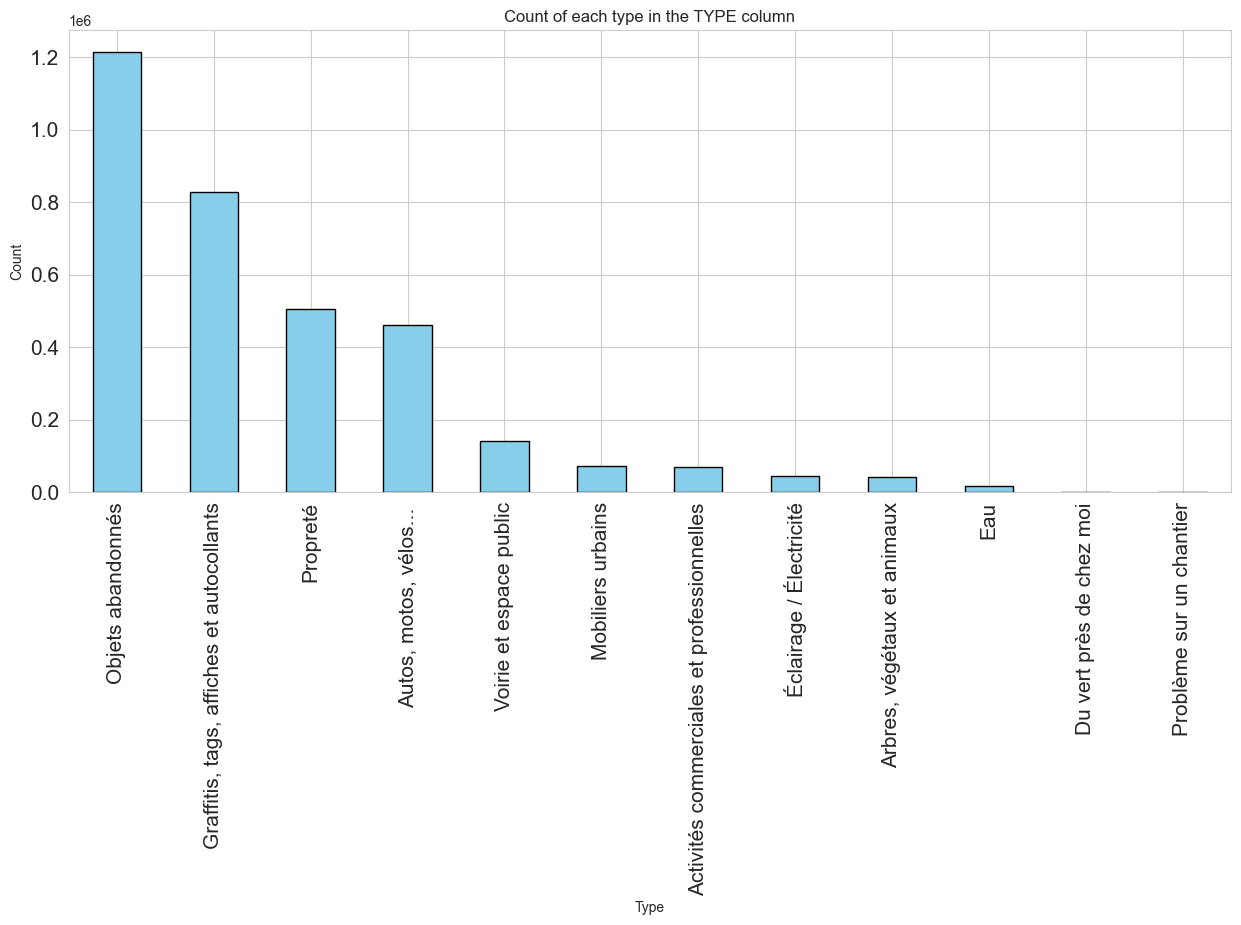

In [103]:
type_count = df_2012_to_2022['TYPE'].value_counts()

plt.figure(figsize=(15, 6))
type_count.plot(kind='bar', rot=90, color='skyblue', edgecolor='black', fontsize=15)
plt.title('Count of each type in the TYPE column')
plt.xlabel('Type')
plt.ylabel('Count')

plt.show()

In [20]:
df_2012_to_2022['TYPE'].value_counts()

Objets abandonnés                             1213822
Graffitis, tags, affiches et autocollants      828709
Propreté                                       505431
Autos, motos, vélos...                         462511
Voirie et espace public                        140947
Mobiliers urbains                               73216
Activités commerciales et professionnelles      70317
Éclairage / Électricité                         45400
Arbres, végétaux et animaux                     41998
Eau                                             17889
Du vert près de chez moi                         1347
Problème sur un chantier                            1
Name: TYPE, dtype: int64

# Edit here

In [21]:
# arrn = ['GBR', 'DEU', 'FRA', 'NLD', 'ITA']
types = ['Objets abandonnés', 'Graffitis, tags, affiches et autocollants', 'Propreté', 'Autos, motos, vélos...', 'Voirie et espace public']
filtered_1 = df_2012_to_2022[df_2012_to_2022['TYPE'].isin(types)][['ARRONDISSEMENT', 'TYPE']]
type(filtered_1['ARRONDISSEMENT'][0])

numpy.int32

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming test is your DataFrame
# You can replace this with your actual DataFrame creation or loading code.
# For example, test = pd.read_csv('your_data.csv')

# Sample data creation
# test = pd.DataFrame({
#     'ARRONDISSEMENT': [1, 2, 3, 4, 5, 1, 2, 3, 4, 5],
#     'TYPE': ['A', 'B', 'C', 'D', 'E', 'A', 'B', 'C', 'D', 'E']
# })

# Group by 'ARRONDISSEMENT' and 'TYPE' and calculate the count
type_counts_3d = filtered_1.groupby(['ARRONDISSEMENT', 'TYPE']).size().reset_index(name='Count')

type(type_counts_3d)
type_counts_3d



,ARRONDISSEMENT,TYPE,Count
0,1,"Graffitis, tags, affiches et autocollants",56848
1,1,Objets abandonnés,21475
2,1,Propreté,20930
3,1,Voirie et espace public,6467
4,2,"Graffitis, tags, affiches et autocollants",13358
...,...,...,...
75,19,Voirie et espace public,8321
76,20,"Graffitis, tags, affiches et autocollants",50369
77,20,Objets abandonnés,139527
78,20,Propreté,43360


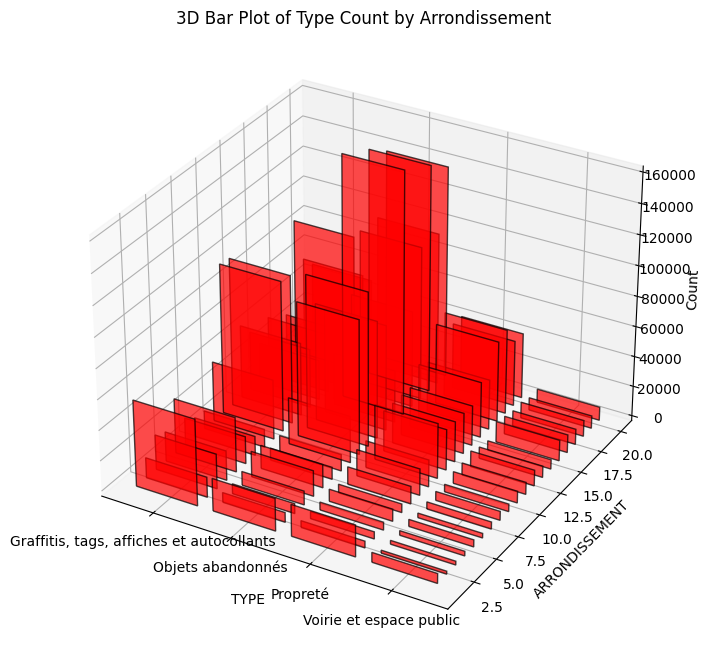

In [23]:
# Create a 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Bar plot for each point
for idx, row in type_counts_3d.iterrows():
    ax.bar(row['TYPE'], row['Count'], row['ARRONDISSEMENT'], zdir='y', color='red', alpha=0.7, edgecolor = 'black', width = 0.8)

# Set labels for axes
ax.set_xlabel('TYPE')
ax.set_ylabel('ARRONDISSEMENT')
ax.set_zlabel('Count')

# Set title
ax.set_title('3D Bar Plot of Type Count by Arrondissement')

# Show the plot
plt.show()

In [38]:
df_2012_to_2022.head()

,ID_DMR,TYPE,SOUSTYPE,ADRESSE,CODE_POSTAL,VILLE,ARRONDISSEMENT,DATEDECL,ANNEEDECL,MOISDECL,NUMERO,PREFIXE,INTERVENANT,CONSEILQUARTIER,LONGITUDE,LATITUDE
0,S2012G000001,Propreté,Déchets et/ou salissures divers,"19-21 rue de rivoli, 75004 PARIS",75004,Paris 4,4,11/07/2012,2012,7,1,S,DPE,SAINT - GERVAIS,2.357108,48.856152
1,S2012G000002,Objets abandonnés,Autres objets encombrants abandonnés,"50 rue de miromesnil, 75008 PARIS",75008,Paris 8,8,12/07/2012,2012,7,2,S,Ramen en tant que prestataire de DansMaRue,ELYSEES - MADELEINE,2.315840,48.874755
2,S2012G000003,Objets abandonnés,Autres objets encombrants abandonnés,"46 rue de miromesnil, 75008 PARIS",75008,Paris 8,8,12/07/2012,2012,7,3,S,Ramen en tant que prestataire de DansMaRue,ELYSEES - MADELEINE,2.315867,48.874429
3,S2012G000004,Propreté,Déchets et/ou salissures divers,"123 boulevard de l'hôpital, 75013 PARIS",75013,Paris 13,13,12/07/2012,2012,7,4,S,DPE,SALPETRIERE - AUSTERLITZ,2.358651,48.835709
4,S2012G000007,Propreté,Déchets et/ou salissures divers,"103 avenue de france, 75013 PARIS",75013,Paris 13,13,12/07/2012,2012,7,7,S,DPE,BIBLIOTHEQUE - SEINE,2.377036,48.829884


In [30]:
tourist = pd.read_csv('tourist.csv', delimiter=';')
tourist

,name,type,@timestamp,@uid,source,@user,@version,boundary,@changeset,@id,Geo Point,Geo Shape
0,Champs-Elysées Montaigne,boundary,2016-07-26T14:10:50Z,158826,JORFTEXT000031223576,cquest,1,tourist_zone,41039106,relation/6438476,"48.8696453644, 2.30581408617","{""coordinates"": [[[2.3018097, 48.8650569], [2...."
1,Saint-Emilion Bibliothèque,boundary,2016-07-26T17:06:41Z,158826,JORFTEXT000031223600,cquest,1,tourist_zone,41042641,relation/6439100,"48.8322590037, 2.38236619356","{""coordinates"": [[[2.3772727, 48.8305537], [2...."
2,Saint-Germain,boundary,2016-07-26T17:30:29Z,158826,JORFTEXT000031223606,cquest,1,tourist_zone,41043224,relation/6439138,"48.8561610492, 2.33321475591","{""coordinates"": [[[2.325727, 48.8559812], [2.3..."
3,Haussmann,multipolygon,2016-07-26T17:22:16Z,158826,JORFTEXT000031223579,cquest,2,tourist_zone,41043008,relation/6438520,"48.8726758395, 2.33251169833","{""coordinates"": [[[2.3328747, 48.8700829], [2...."
4,Saint-Honoré - Vendôme,boundary,2016-07-26T17:22:16Z,158826,JORFTEXT000031223603,cquest,1,tourist_zone,41043008,relation/6439132,"48.8661054363, 2.33178719914","{""coordinates"": [[[2.3407651, 48.8607861], [2...."
5,Maillot-Ternes,boundary,2016-07-26T15:53:40Z,158826,JORFTEXT000031223588,cquest,2,tourist_zone,41041163,relation/6438646,"48.8775914895, 2.28853802877","{""coordinates"": [[[[2.293907, 48.8727627], [2...."
6,Montmartre,boundary,2016-07-26T16:15:57Z,158826,JORFTEXT000031223591,cquest,1,tourist_zone,41041604,relation/6438767,"48.8857149271, 2.33866741674","{""coordinates"": [[[2.3344995, 48.886017], [2.3..."
7,Rennes - Saint-Sulpice,boundary,2016-07-26T17:30:29Z,158826,JORFTEXT000031223597,cquest,2,tourist_zone,41043224,relation/6439069,"48.8509428476, 2.32819085921","{""coordinates"": [[[2.325727, 48.8559812], [2.3..."
8,Olympiades,boundary,2016-07-26T16:39:02Z,158826,JORFTEXT000031223594,cquest,1,tourist_zone,41042071,relation/6439048,"48.8254377721, 2.36253162644","{""coordinates"": [[[2.3576778, 48.8263716], [2...."
9,Les Halles,boundary,2016-07-26T17:22:16Z,158826,JORFTEXT000031223585,cquest,2,tourist_zone,41043008,relation/6438629,"48.8610069139, 2.34864471812","{""coordinates"": [[[2.3430665, 48.865238], [2.3..."


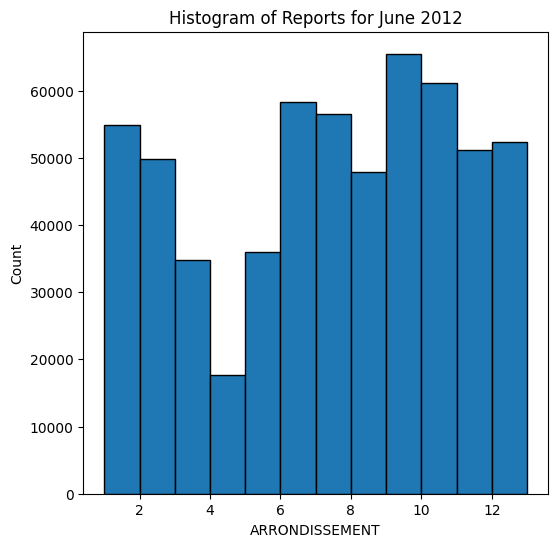

In [56]:
# Filter the DataFrame for June 2012
# filtered_df = df_2012_to_2022[(df_2012_to_2022['ANNEEDECL'] == 2013) & (df_2012_to_2022['MOISDECL'] == 6)]
filtered_df = df_2012_to_2022[(df_2012_to_2022['ANNEEDECL'] == 2020)]

# print(filtered_df)
# Plot the histogram
plt.figure(figsize=(6, 6))
plt.hist(filtered_df['MOISDECL'], bins=range(1, max(df_2012_to_2022['MOISDECL']) + 2), edgecolor='black')
plt.title('Histogram of Reports for June 2012')
plt.xlabel('ARRONDISSEMENT')
plt.ylabel('Count')
plt.show()

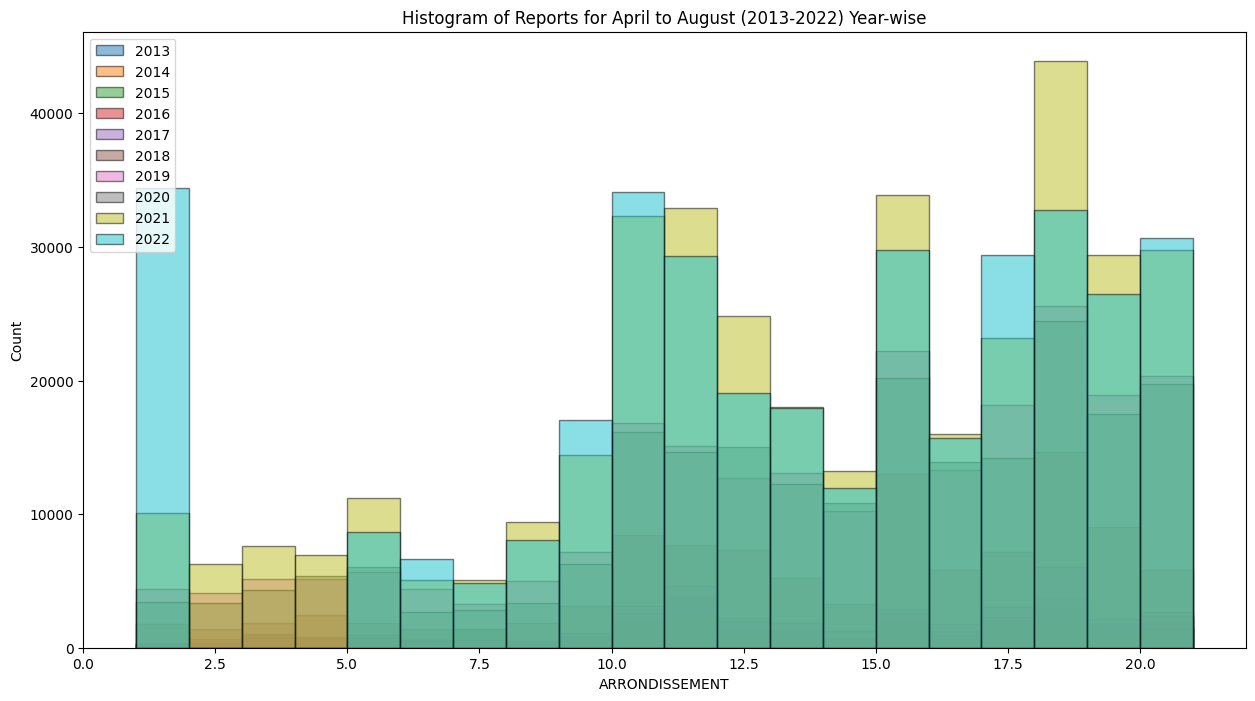

In [58]:
# # Filter the DataFrame for the desired months and years
# filtered_df = df_2012_to_2022[(df_2012_to_2022['ANNEEDECL'].between(2013, 2022)) & (df_2012_to_2022['MOISDECL'].between(4, 8))]

# # Plot histograms year-wise
# years = filtered_df['ANNEEDECL'].unique()

# plt.figure(figsize=(15, 8))
# for year in years:
#     year_data = filtered_df[filtered_df['ANNEEDECL'] == year]
#     plt.hist(year_data['ARRONDISSEMENT'], bins=range(1, max(df_2012_to_2022['ARRONDISSEMENT']) + 2), edgecolor='black', alpha=0.5, label=str(year))

# plt.title('Histogram of Reports for April to August (2013-2022) Year-wise')
# plt.xlabel('ARRONDISSEMENT')
# plt.ylabel('Count')
# plt.legend()
# plt.show()

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:27: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


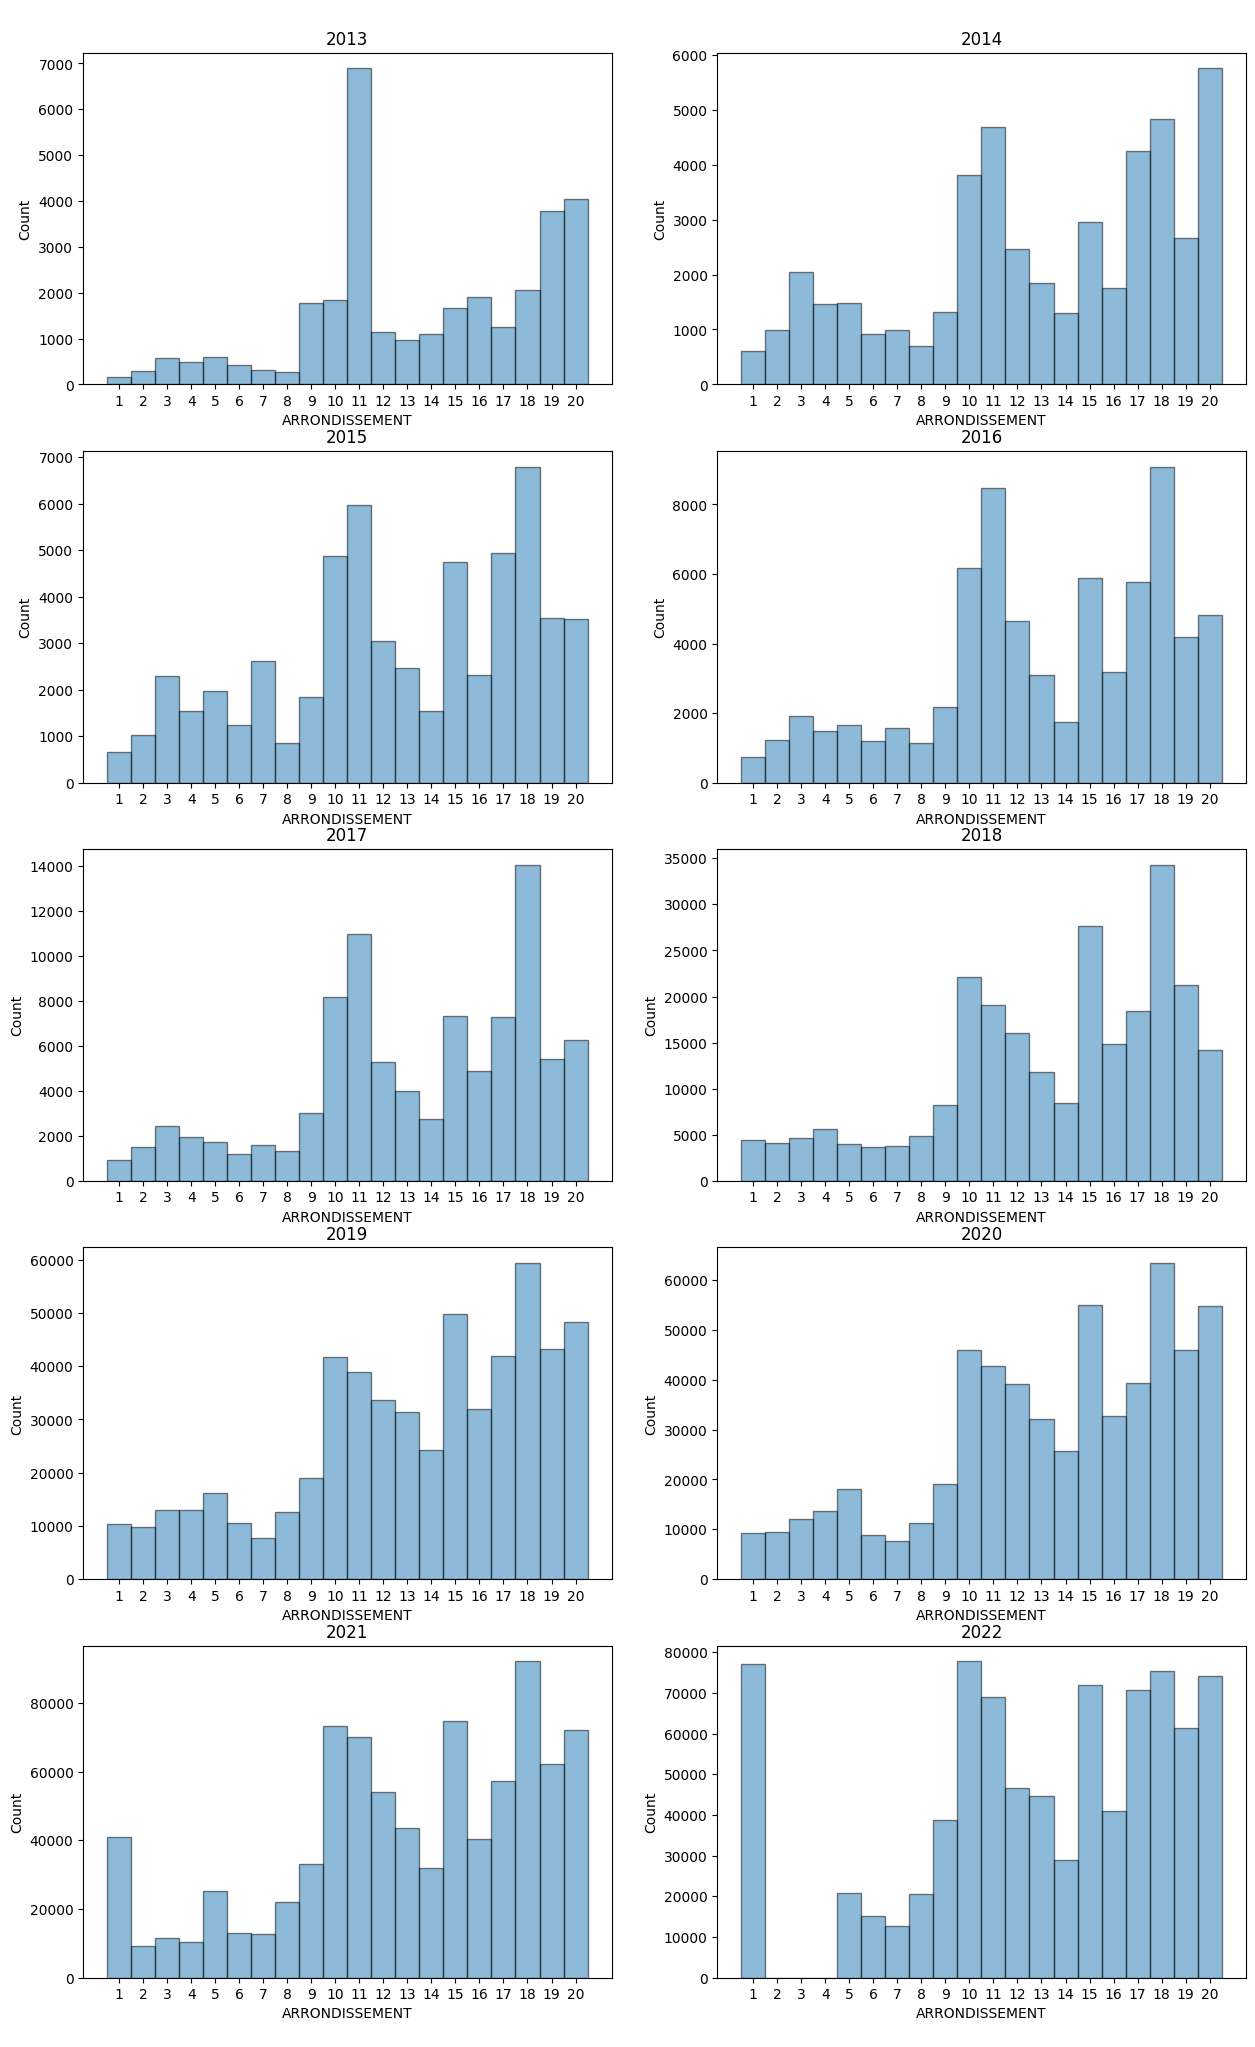

In [84]:
# Filter the DataFrame for the desired months and years
from matplotlib.pyplot import GridSpec 
# filtered_df = df_2012_to_2022[(df_2012_to_2022['ANNEEDECL'].between(2013, 2022)) & (df_2012_to_2022['MOISDECL'].between(4, 8))]
filtered_df = df_2012_to_2022[(df_2012_to_2022['ANNEEDECL'].between(2013, 2022))]

# Create subplots for each year
# Filter the DataFrame for the desired months and years
# Create subplots using gridspec
years = filtered_df['ANNEEDECL'].unique() 
num_years = len(years)
num_plots_per_row = 2
num_rows = (num_years + num_plots_per_row - 1) // num_plots_per_row

fig = plt.figure(figsize=(15, num_rows *5))
gs = GridSpec(num_rows, num_plots_per_row, width_ratios=[1]*num_plots_per_row, wspace=0.2)

for i, year in enumerate(years):
    year_data = filtered_df[filtered_df['ANNEEDECL'] == year]
    ax = plt.subplot(gs[i // num_plots_per_row, i % num_plots_per_row])
    ax.hist(year_data['ARRONDISSEMENT'], bins=range(1, max(df_2012_to_2022['ARRONDISSEMENT']) + 2), edgecolor='black', alpha=0.5)
    ax.set_title(f'\n{year}')
    ax.set_xlabel('ARRONDISSEMENT\n')
    bar_centers = [x + 0.5 for x in range(1, max(df_2012_to_2022['ARRONDISSEMENT']) + 1)]
    ax.set_xticks(bar_centers, range(1, max(df_2012_to_2022['ARRONDISSEMENT']) + 1))
    ax.set_ylabel('Count')

plt.tight_layout()

plt.show()

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:24: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


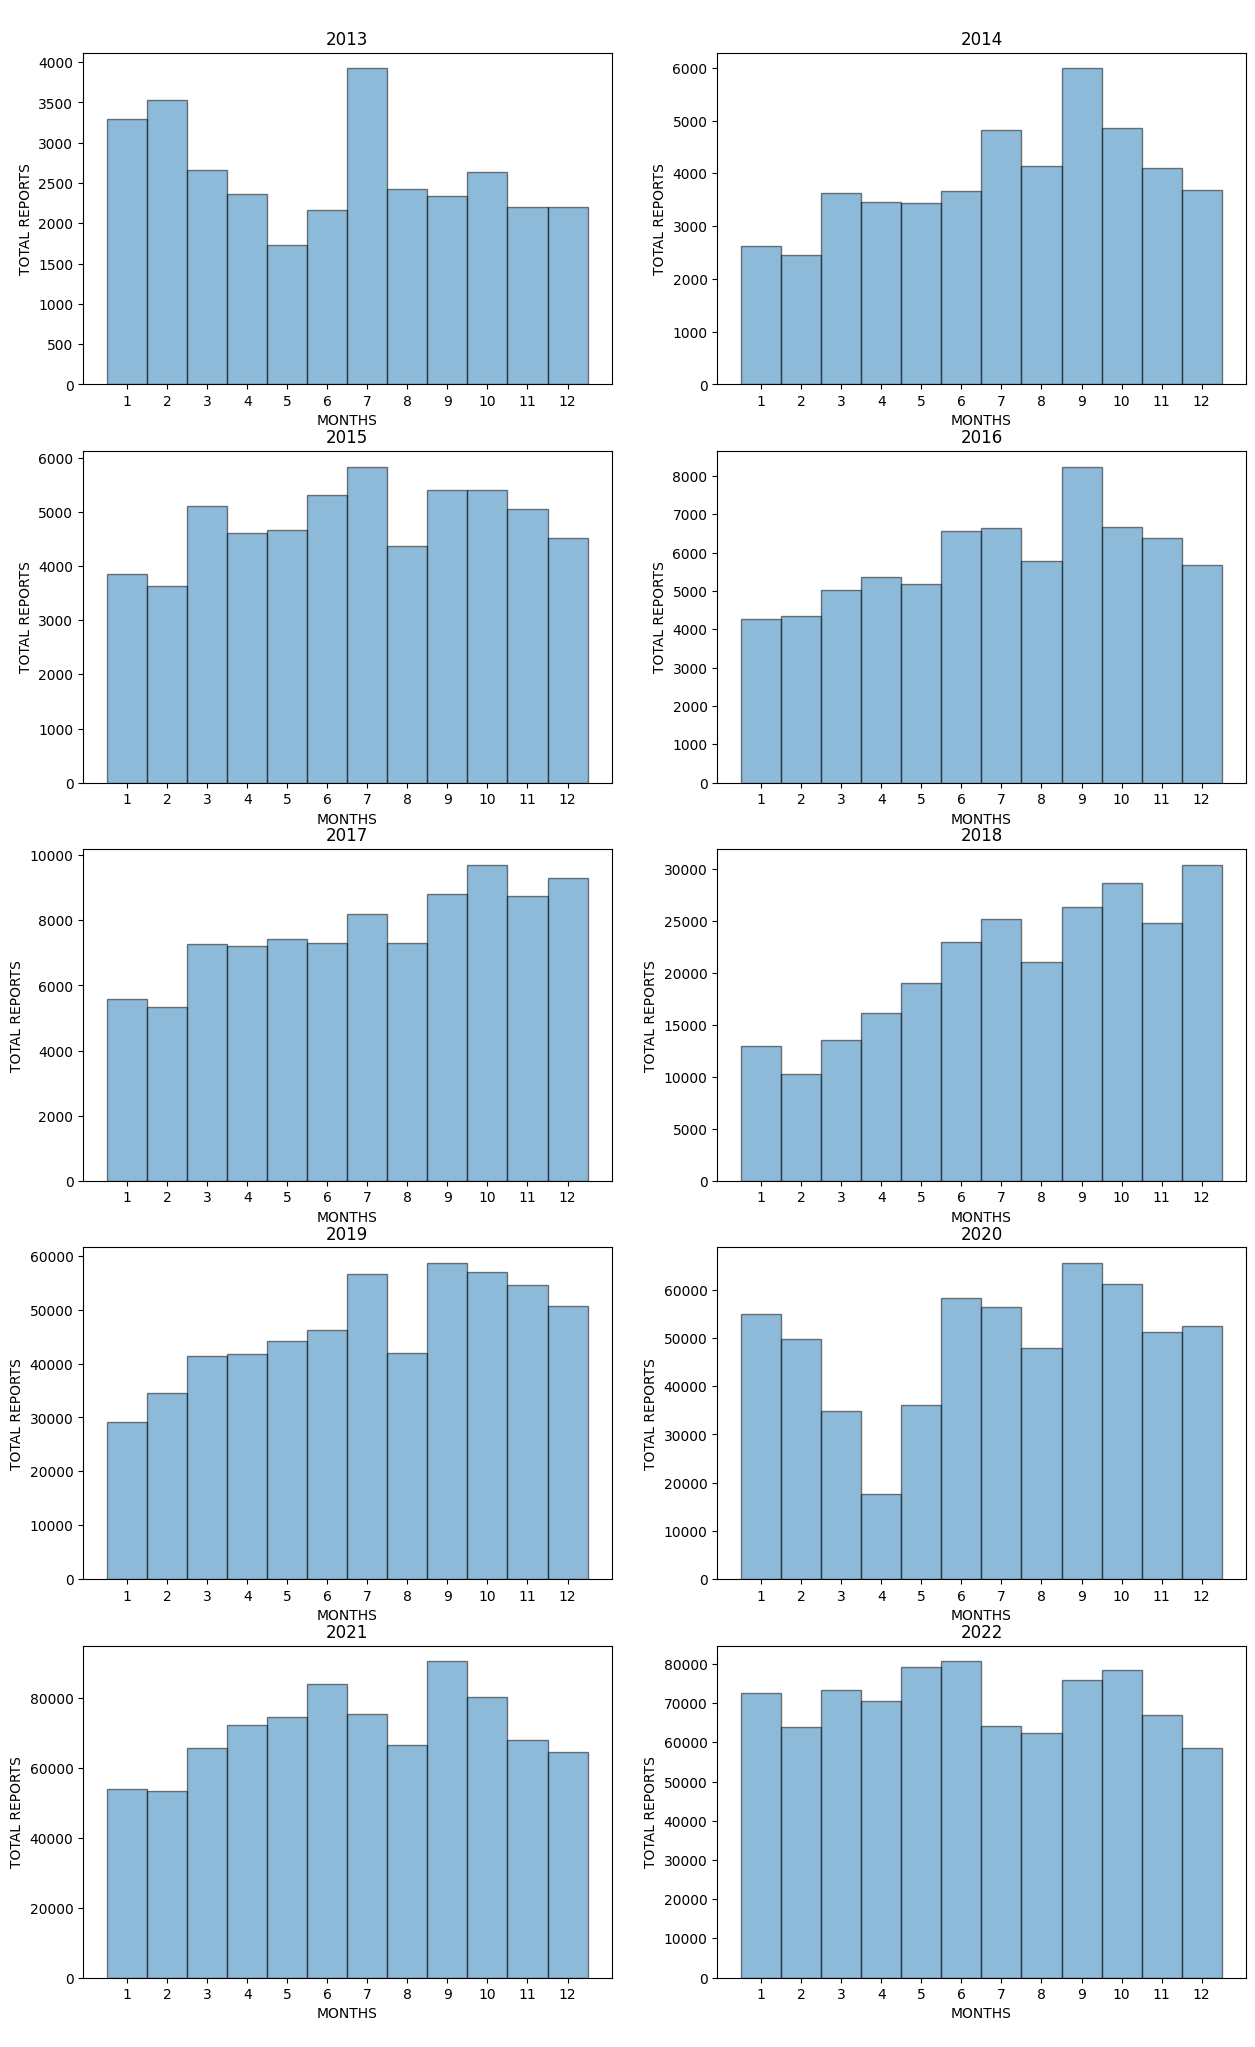

In [83]:
from matplotlib.pyplot import GridSpec 
filtered_df = df_2012_to_2022[(df_2012_to_2022['ANNEEDECL'].between(2013, 2022))]
# Create subplots for each year
# Filter the DataFrame for the desired months and years
# Create subplots using gridspec
years = filtered_df['ANNEEDECL'].unique() 
num_years = len(years)
num_plots_per_row = 2
num_rows = (num_years + num_plots_per_row - 1) // num_plots_per_row

fig = plt.figure(figsize=(15, num_rows *5))
gs = GridSpec(num_rows, num_plots_per_row, width_ratios=[1]*num_plots_per_row, wspace=0.2)

for i, year in enumerate(years):
    year_data = filtered_df[filtered_df['ANNEEDECL'] == year]
    ax = plt.subplot(gs[i // num_plots_per_row, i % num_plots_per_row])
    ax.hist(year_data['MOISDECL'], bins=range(1, max(df_2012_to_2022['MOISDECL']) + 2), edgecolor='black', alpha=0.5)
    ax.set_title(f'\n{year}')
    ax.set_xlabel('MONTHS\n')
    bar_centers = [x + 0.5 for x in range(1, max(df_2012_to_2022['MOISDECL']) + 1)]
    ax.set_xticks(bar_centers, range(1, max(df_2012_to_2022['MOISDECL']) + 1))
    ax.set_ylabel('TOTAL REPORTS')

plt.tight_layout()

plt.show()

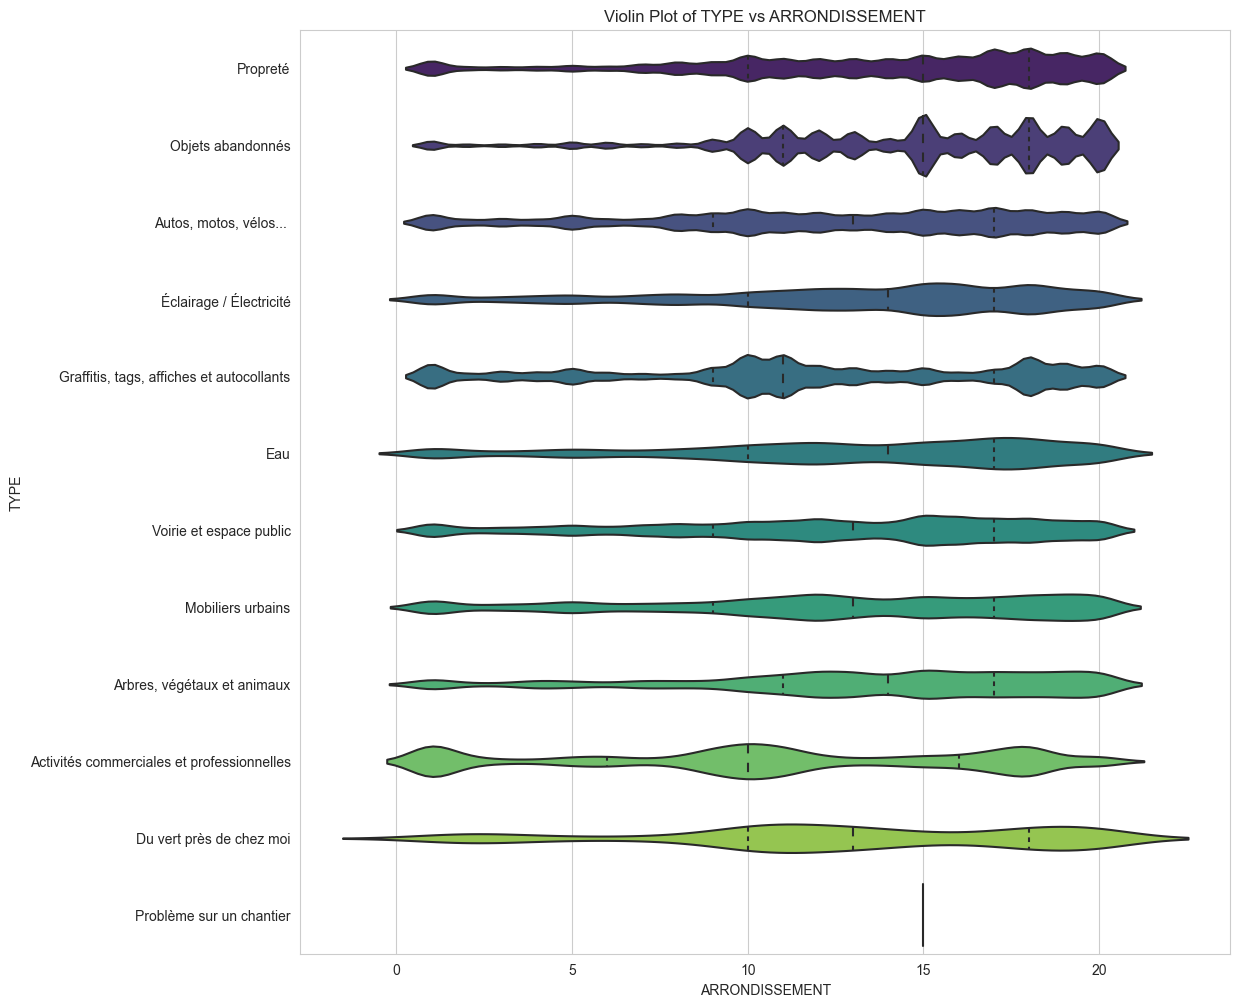

In [104]:
import seaborn as sns

# sns.set_style("whitegrid")
plt.figure(figsize=(12, 12))
sns.violinplot(x='ARRONDISSEMENT', y='TYPE', data=df_2012_to_2022, inner="quartile", palette="viridis")
plt.title('Violin Plot of TYPE vs ARRONDISSEMENT')
# plt.xticks(bar_centers, range(1, max(df_2012_to_2022['ARRONDISSEMENT']) + 1))
plt.savefig('Violin.png')
plt.show()

<Figure size 800x600 with 0 Axes>

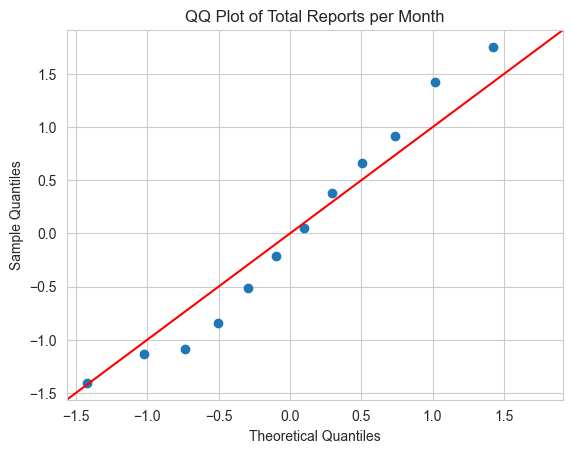

In [99]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

total_reports_per_month = df_2012_to_2022.groupby('MOISDECL')['ID_DMR'].count()

# Create a QQ plot
plt.figure(figsize=(8, 6))
sm.qqplot(total_reports_per_month, fit=True, line='45')  # Using log transformation for better visualization
plt.title('QQ Plot of Total Reports per Month')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

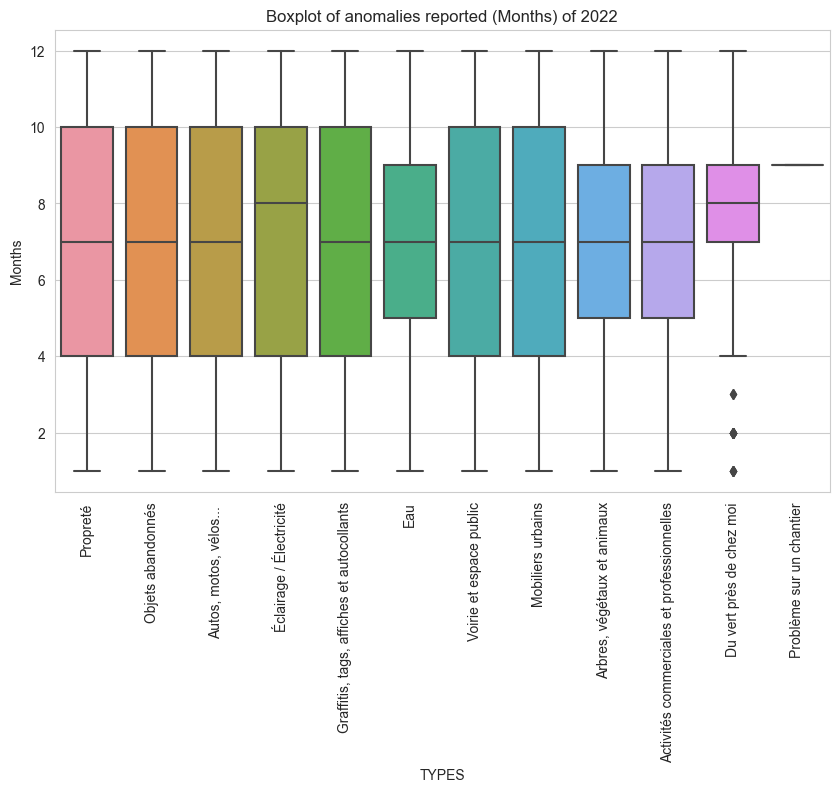

In [113]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='TYPE', y='MOISDECL', data=df_2012_to_2022)
plt.xticks(rotation=90)
plt.title('Boxplot of anomalies reported (Months) of 2022')
plt.xlabel('TYPES')
plt.ylabel('Months')
plt.show()